In [1]:
#STEP 1: Load and inspect data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load data
data = pd.read_csv(r"C:\Users\Diya\Downloads\breast_cancer.csv")

In [2]:
print(data)
print(data.head())
print(data.info())
print(data.describe())

     radius  texture  perimeter    area  smoothness  compactness  concavity  \
0     17.99    10.38     122.80  1001.0     0.11840      0.27760    0.30010   
1     20.57    17.77     132.90  1326.0     0.08474      0.07864    0.08690   
2     19.69    21.25     130.00  1203.0     0.10960      0.15990    0.19740   
3     11.42    20.38      77.58   386.1     0.14250      0.28390    0.24140   
4     20.29    14.34     135.10  1297.0     0.10030      0.13280    0.19800   
..      ...      ...        ...     ...         ...          ...        ...   
564   21.56    22.39     142.00  1479.0     0.11100      0.11590    0.24390   
565   20.13    28.25     131.20  1261.0     0.09780      0.10340    0.14400   
566   16.60    28.08     108.30   858.1     0.08455      0.10230    0.09251   
567   20.60    29.33     140.10  1265.0     0.11780      0.27700    0.35140   
568    7.76    24.54      47.92   181.0     0.05263      0.04362    0.00000   

     symmetry  Fractal_Dimension diagnosis  
0     

In [8]:
#STEP 2: Handling missing data

# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

# Fill missing values for all columns
data.fillna({
    'radius': data['radius'].mean(),
    'texture': data['texture'].mean(),
    'perimeter': data['perimeter'].mean(),
    'area': data['area'].median(),
    'smoothness': data['smoothness'].median(),
    'compactness': data['compactness'].median(),
    'concavity': data['concavity'].mean(),
    'symmetry': data['symmetry'].mean(),
    'Fractal_Dimension': data['Fractal_Dimension'].mean()
}, inplace=True)

print("Missing values after filling:\n", data.isnull().sum())

Missing values per column:
 radius               1
texture              1
perimeter            2
area                 1
smoothness           0
compactness          3
concavity            2
symmetry             1
Fractal_Dimension    0
diagnosis            0
dtype: int64
Missing values after filling:
 radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
concavity            0
symmetry             0
Fractal_Dimension    0
diagnosis            0
dtype: int64


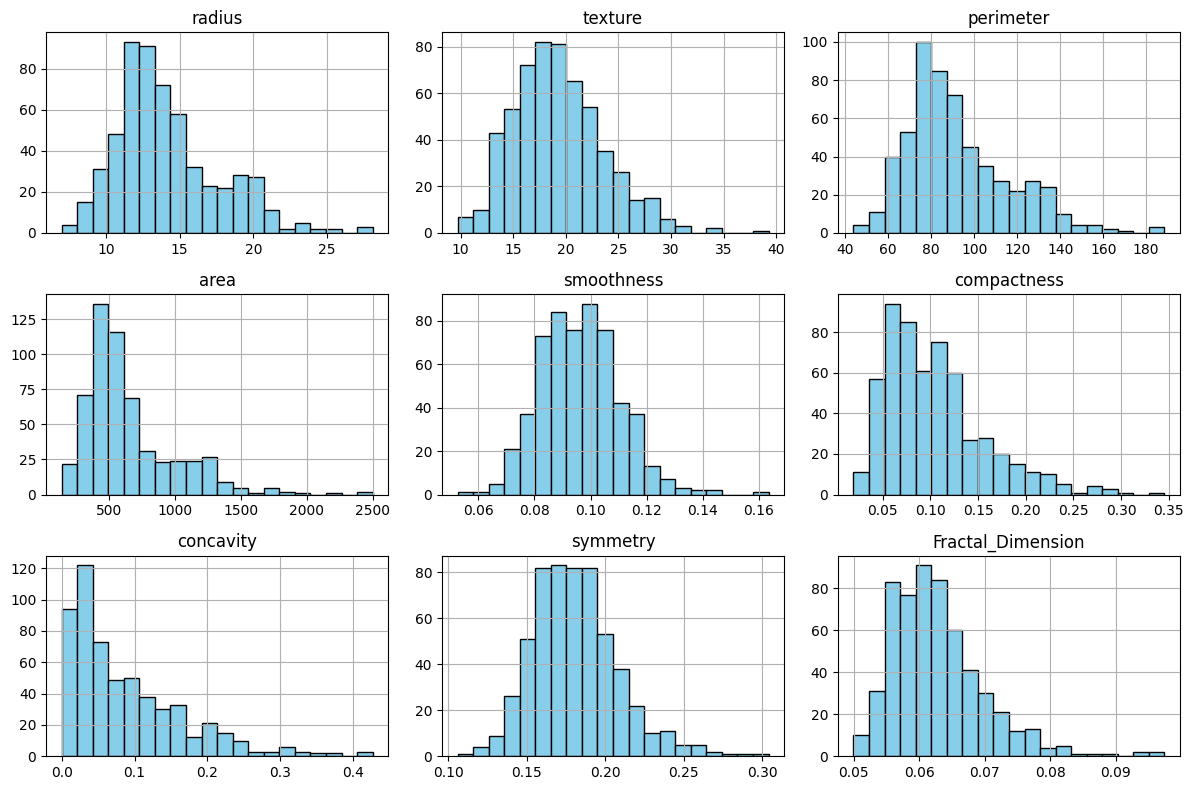

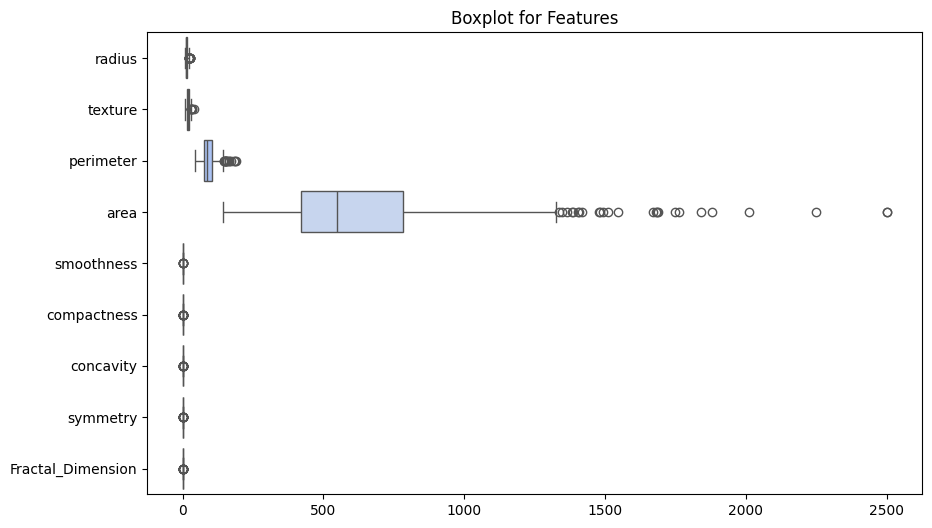

In [10]:
#UNIVARIATE ANALYSIS
# Histogram for feature distributions
data.hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

# Boxplot for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.iloc[:, :-1], orient='h', palette='coolwarm')
plt.title("Boxplot for Features")
plt.show()

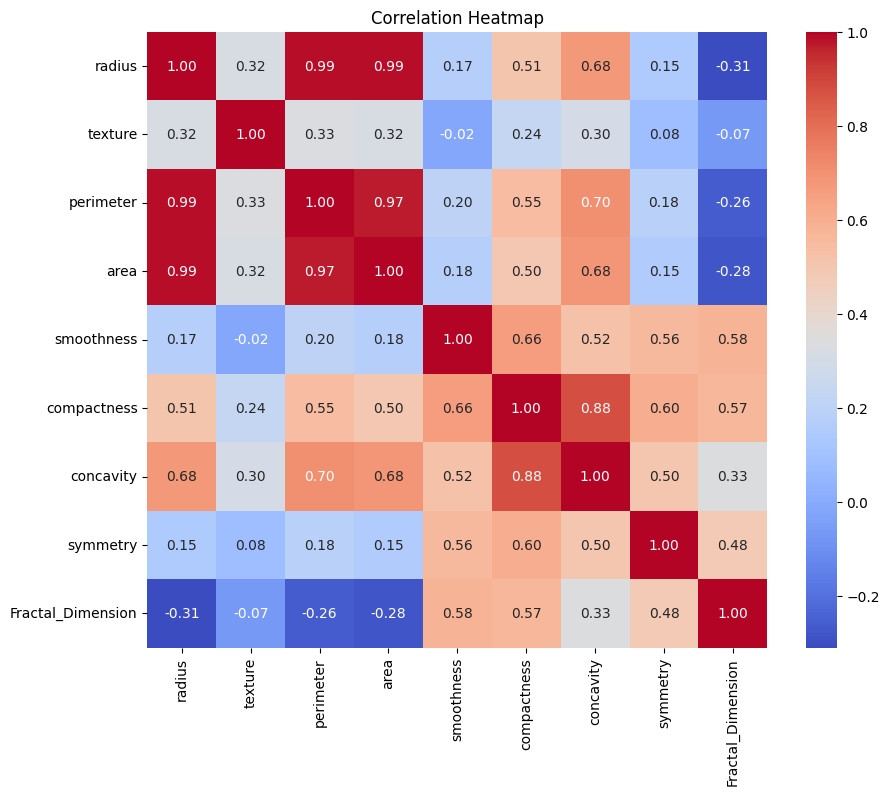

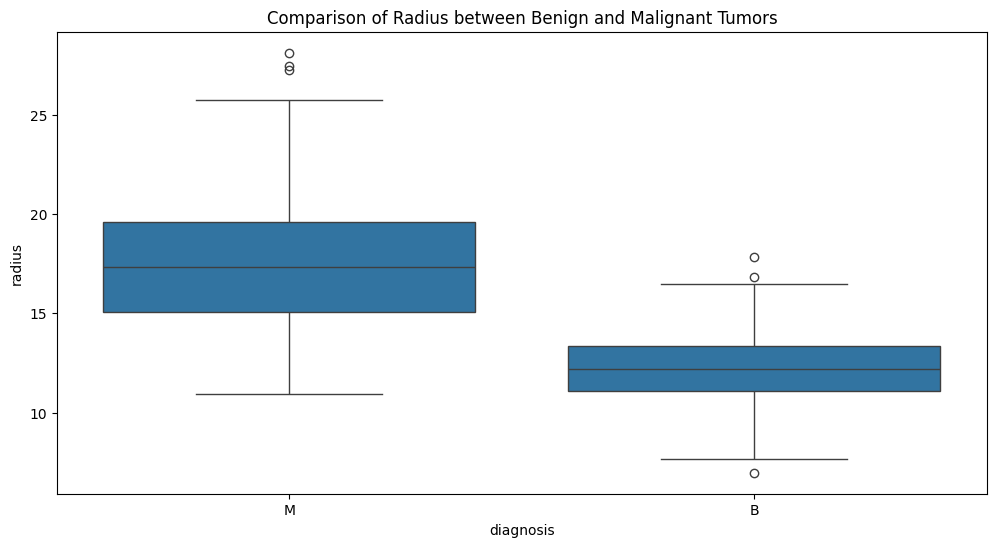

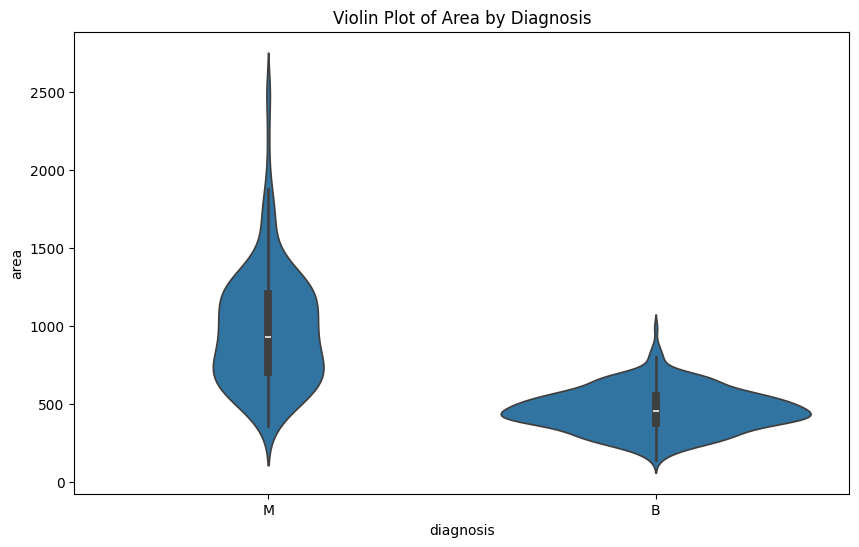

In [14]:
#BIVARIATE ANALYSIS
# Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Boxplot: Feature vs Diagnosis
plt.figure(figsize=(12, 6))
sns.boxplot(x="diagnosis", y="radius", data=data)
plt.title('Comparison of Radius between Benign and Malignant Tumors')
plt.show()

# Violin plot for 'Area' vs 'Diagnosis'
plt.figure(figsize=(10, 6))
sns.violinplot(x='diagnosis', y='area', data=data)
plt.title('Violin Plot of Area by Diagnosis')
plt.show()

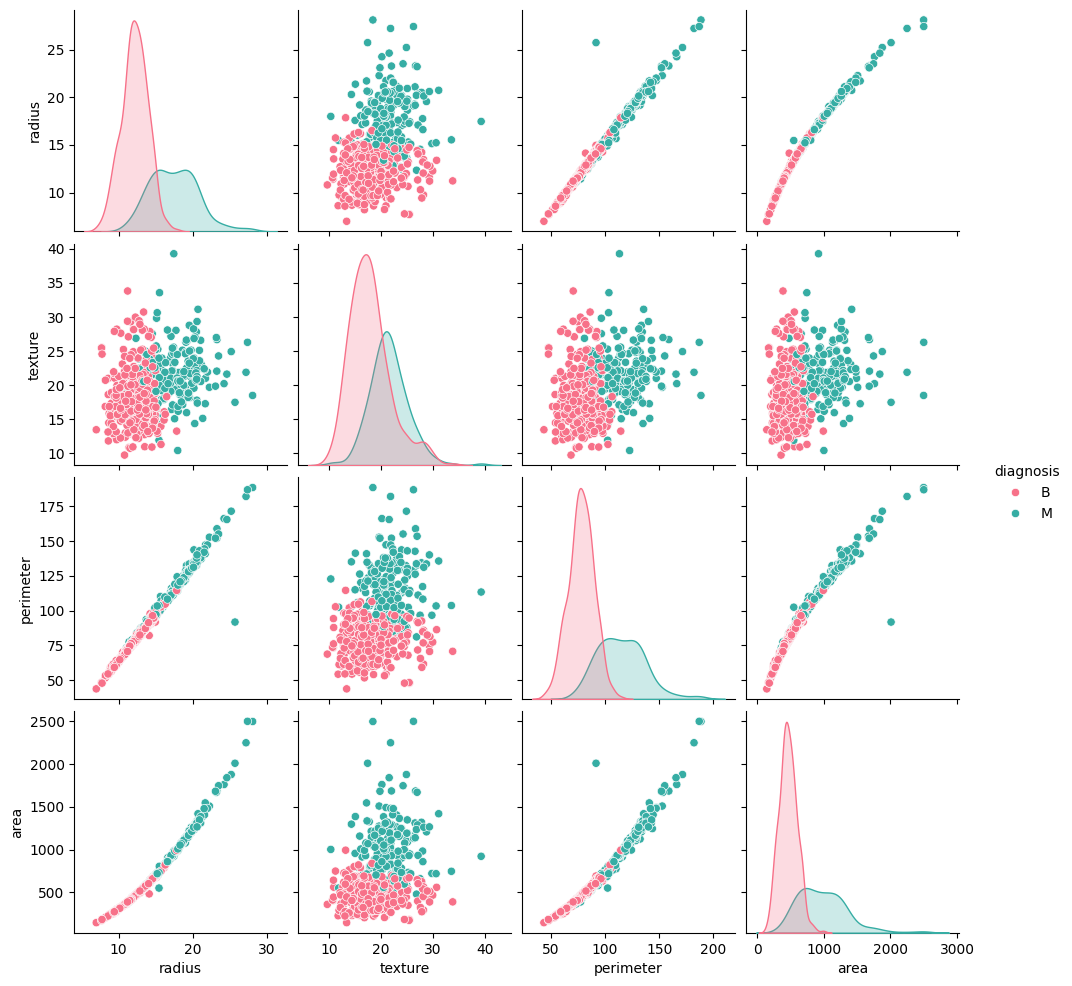

In [16]:
#MULTIVARIATE ANALYSIS

data['diagnosis'] = data['diagnosis'].astype('category')

# Pair plot for selected features
selected_features = ["radius", "texture", "perimeter", "area", "diagnosis"]
sns.pairplot(data[selected_features], hue="diagnosis", palette="husl")
plt.show()